# Single systems

In [7]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])
print(ket0 / 2 + ket1 / 2)

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

# Matrix multiplication, including matrix-vector multiplication as a special case, can be performed using the matmul
print("Now we print some multiplications")
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[0.5]
 [0.5]]
[[1.  0.5]
 [0.  0.5]]
Now we print some multiplications
[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [10]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M,M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

# Function for checking if a certain statevector is valid, namely if it has Euclidean norm equal to 1
display(u.is_valid())
display(w.is_valid())

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


True

False

### We can simulate the measurement of a certain Statevector

In this case we take the vector v.

Running the measure method simulates a standard basis measurement. 

It returns the outcome of that measurement, plus the new quantum state vector of the system after the measurement. 

In [43]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state")
display(state.draw("latex"))

Measured: 0
Post-measurement state


<IPython.core.display.Latex object>

We can also use sample_counts, which allows for the simulation of any number of measurements on the system, each time starting with a fresh copy of the state.

With more and more samples, the fraction of samples for each possibility is likely to get closer and closer to the corresponding probability. This phenomenon, more generally speaking, is known as the law of large numbers in probability theory.

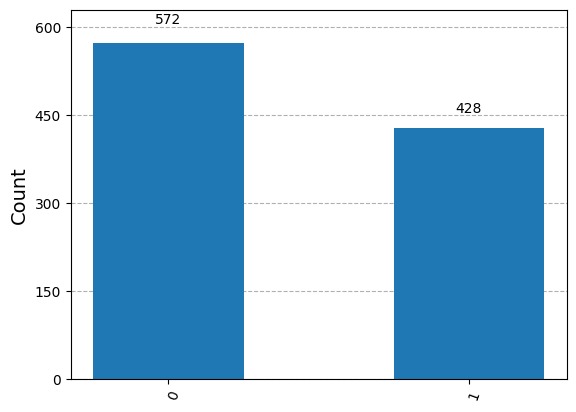

In [51]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

### Performing operations with Operator and Statevector

Unitary operations can be defined in Qiskit using the Operator class.

In [53]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])
display(H.draw("latex"))

<IPython.core.display.Latex object>

We can apply a unitary operation to a state vector using the evolve method.


In [62]:
v = Statevector([1,0])

v = v.evolve(H).evolve(T).evolve(H).evolve(S).evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

We can then create quantum circuits 

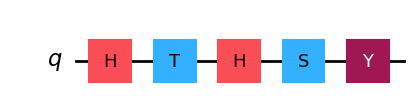

In [65]:
from qiskit import QuantumCircuit

circuit  = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw("mpl"))

We can get the unitary matrix corresponding to this circuit using the from_circuit method from the Operator class.

In [66]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

We can also initialise a starting quantum state vector and then evolve the state acording to the sequence of operations described by the circuit.

In [67]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

The following code simulates an experiment where the state obtained from the circuit above is measured with a standard basis measurement 4,000 times (using a fresh copy of the state each time).

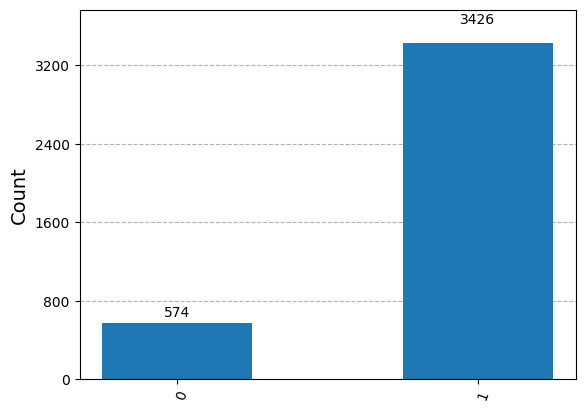

In [80]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

# Multiple systems

### Tensor Products

In [88]:
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt

zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [97]:
plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex"))

<IPython.core.display.Latex object>

In [98]:
display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

In [104]:
H = Operator.from_label("H")
I = Operator.from_label("I")
X = Operator.from_label("X")
display(H.draw("latex"))
display(H.tensor(I).draw("latex"))
display(H.tensor(I).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [105]:
display((H^I^X).draw("latex"))

<IPython.core.display.Latex object>

Compound states can be evolved using compound operations as we would expect — just like we saw for single systems in the previous lesson. For example, the following code computes the state (H⊗I) ∣ϕ⟩ for ∣ϕ⟩= ∣+⟩ ⊗ ∣−i⟩ (which was already defined above).

In [107]:
phi = plus.tensor(minus_i)
display(phi.evolve(H^I).draw("latex"))

<IPython.core.display.Latex object>

We can define now a CX operation that calculates CX ∣ψ⟩ for ∣ψ⟩ = ∣+⟩ ⊗ ∣0⟩. This a controlled-X operation, where the left-hand qubit is the control and the right-hand qubit is the target. The result is the Bell state ∣ϕ+⟩.

In [108]:
CX = Operator(
    [[1,0,0,0],
     [0,1,0,0],
     [0,0,0,1],
     [0,0,1,0]]
)
psi = plus.tensor(zero)
display(psi.evolve(CX).draw("latex"))

<IPython.core.display.Latex object>

### Partial measurements

We used the measure method to simulate a measurement of a quantum state vector. This method returns two items: the simulated measurement result, and the new Statevector given this measurement.

By default, measure measures all qubits in the state vector. We can, alternatively, provide a list of integers as an argument, which causes only those qubit indices to be measured.

The code below creates a state ∣w⟩ and measures qubit number 0, the rightmost qubit (as in Qiskit convention).

In [123]:
w = Statevector([0,1,1,0,1,0,0,0] / sqrt(3))
display(w.draw("latex"))

result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

result, state = w.measure([0,1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Measured: 01
State after measurement:


<IPython.core.display.Latex object>

# Quantum Circuits

### Introduction

We will be using the Aer simulator to simulate the quantum circuits (so they are not run on real computers)

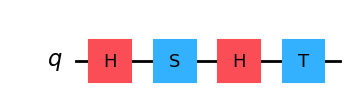

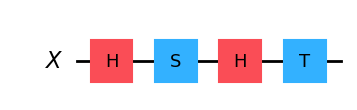

In [125]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# We can build a circuit acting on a state X, as THSH acting on X:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

# If we wish to choose our own name we can do this using the QuantumRegister class, 
# which allows us to name a collection of qubits as treat it as a single object.

X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

Let's create now a circuit that convert from standard basis to Bell basis

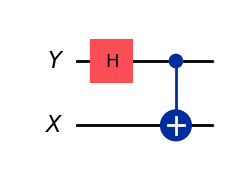

<IPython.core.display.Latex object>

In [140]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")

circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y,X)

display(circuit.draw("mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

We can also include classical bits, and include measurement gates. The outcome of the measurement gates is stored into the classical bits

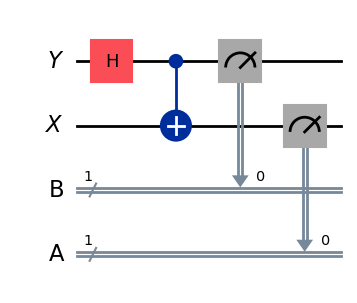

In [142]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw("mpl"))

We can then simulate the simulate the circuit with Aer

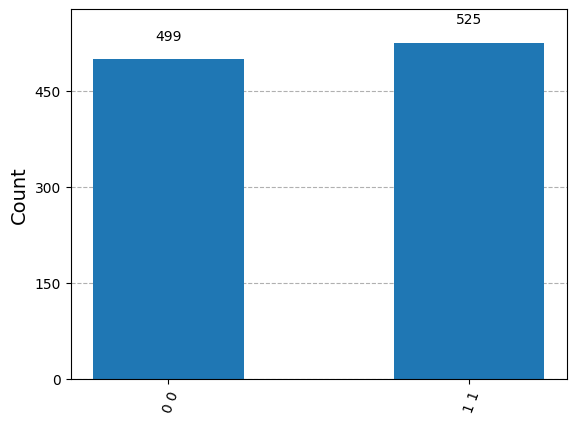

In [150]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# Teleportation

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

### Quantum circuit implementation of the releportation protocol

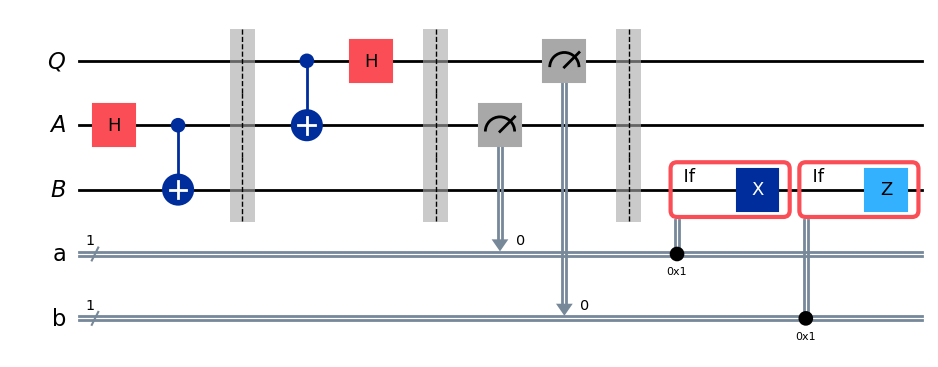

In [3]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("mpl"))

The barrier function creates a visual separation making the circuit diagram more readable, and it also prevents Qiskit from performing various simplifications and optimizations across the barrier during compilation when circuits are run on real hardware. The if_test function applies an operation conditionally depending on a classical bit or register.

To test that the protocol works correctly, we'll apply a randomly generated single-qubit gate to the initialized ∣0⟩ state of Q to obtain a random quantum state vector to be teleported. By applying the inverse (i.e., conjugate transpose) of that gate to B after the protocol is run, we can verify that the state was teleported by measuring to see that it has returned to the ∣0⟩ state.

In [4]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

Now we'll create a new testing circuit that first applies our random gate to Q, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit B and measures. The outcome should be 0 with certainty.

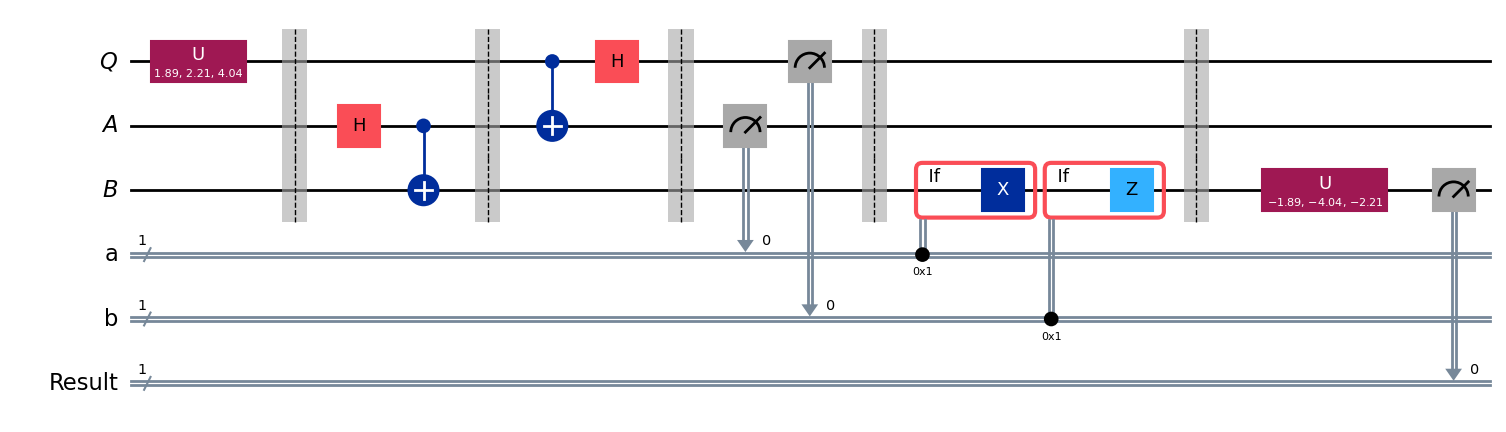

In [5]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))

Finally, let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 0, indicating that the qubit Q was successfully teleported into B, while the other two bits should be roughly uniform.

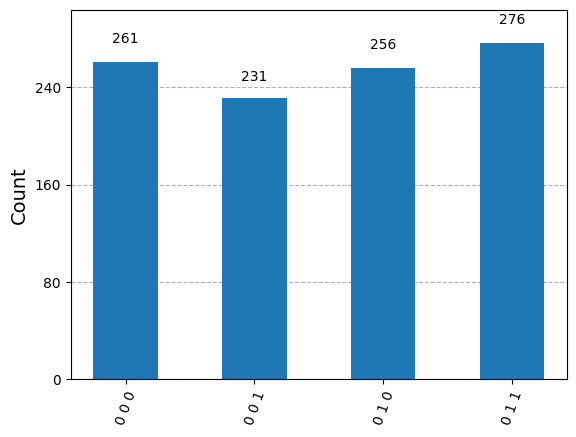

In [9]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

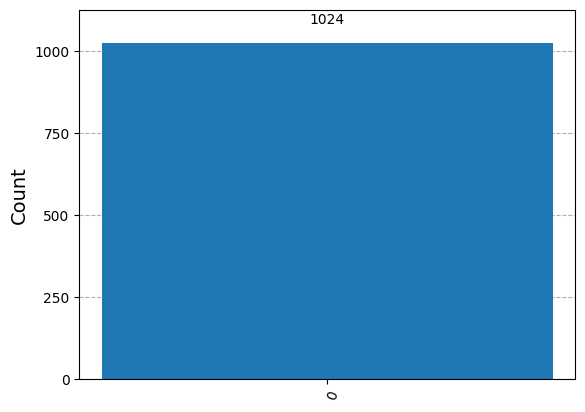

In [10]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

# Superdense coding

Not much is new here, except the measure_all function, which measures all of the qubits and puts the results into a single classical register (therefore having two bits in this case).

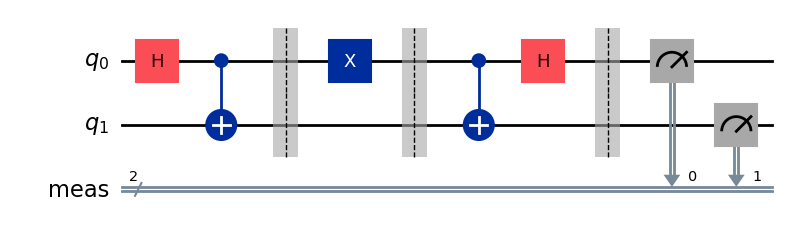

In [11]:
c = "1"
d = "0"
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output="mpl"))

Now the Aer simulator produces the expected output.

Measured 10 with frequency 1024


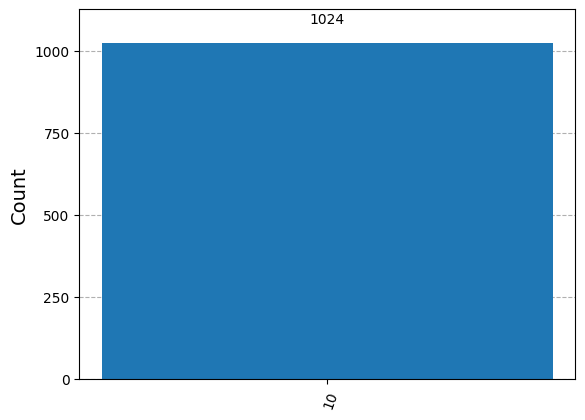

In [12]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

Now let's use an additional qubit as a random bit generator — essentially to flip fair coins. We'll use it to randomly choose c and d, and then run the superdense coding protocol.

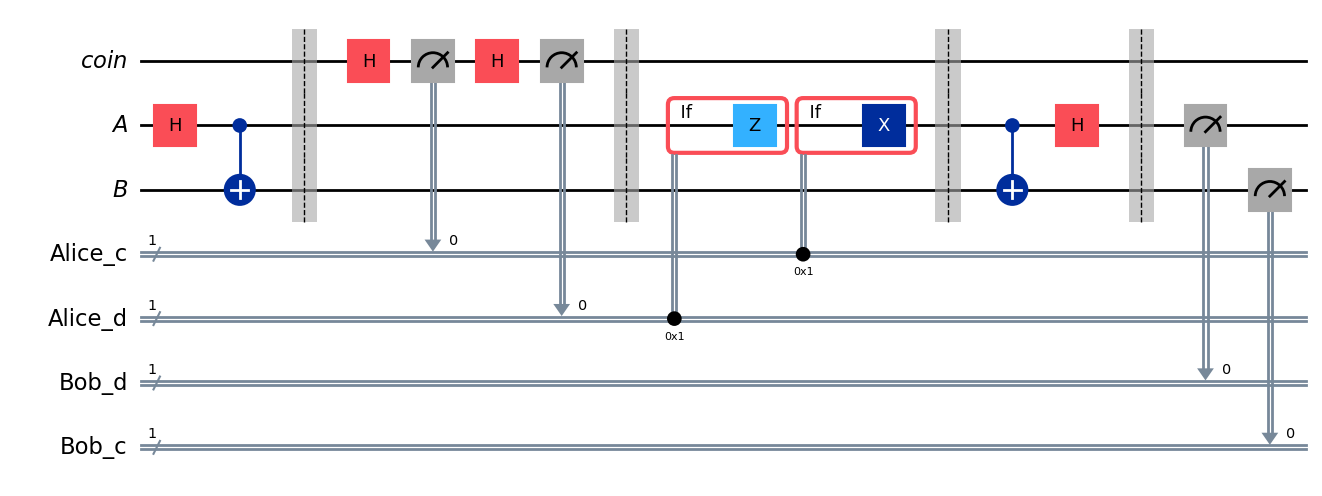

In [13]:
rbg = QuantumRegister(1, "coin")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice_c")
Alice_d = ClassicalRegister(1, "Alice_d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_c, Alice_d)

# Initialise the qubit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'coin' qubit twice to generate Alice's bits c and d
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend on her bits
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw("mpl"))

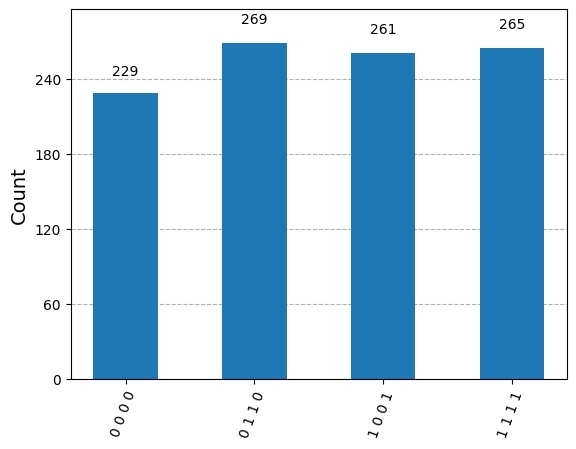

In [23]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# The CHSH game

The first have to define the game itself

In [25]:
def CHSH_game(strategy):

    x, y = random.randint(0, 2), random.randint(0, 2)

    a, b = strategy(x, y)

    if (a != b) == (x & y):
        return 1
    return 0

def CHSH_circuit(x, y):
    qc = QuantumCircuit(2, 2)

    # Prepare an e-bit
    qc.h(0)
    qc.cx(0, 1)

    # Alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob's actions
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

Here are the four possible circuits, depending on which questions are asked.



(x,y) = (0,0)


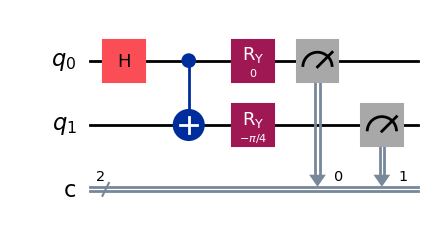

(x,y) = (0,1)


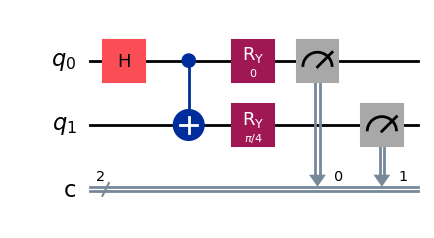

(x,y) = (1,0)


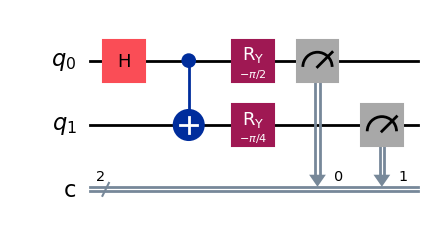

(x,y) = (1,1)


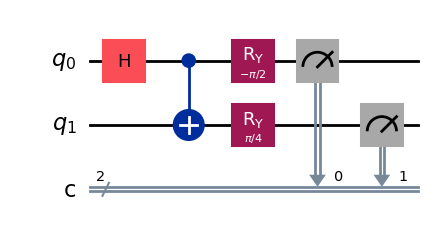

In [26]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(CHSH_circuit(0, 0).draw(output="mpl"))

print("(x,y) = (0,1)")
display(CHSH_circuit(0, 1).draw(output="mpl"))

print("(x,y) = (1,0)")
display(CHSH_circuit(1, 0).draw(output="mpl"))

print("(x,y) = (1,1)")
display(CHSH_circuit(1, 1).draw(output="mpl"))

Now we'll create a job using the Aer simulator that runs the circuit a single time for a given input pair (x, y)

In [27]:
def quantum_strategy(x, y):
    # This function runs the appropiate quantum circuit defined above one time and returns the measurement results

    # Setting 'shots=1' to run the circuit once
    result = AerSimulator().run(CHSH_circuit(x, y), shots=1).result()
    statistics = result.get_counts()

    # Determine the output bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

Finally, we'll play the game 1,000 times and compute the fraction of them that the strategy wins.



In [31]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += CHSH_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.84


We can also define a classical strategy and see how well it works. This is just one strategy — others can be tested by changing the code — but it is among the optimal classical strategies.

In [35]:
def classical_strategy(x, y):
    # This functions implements just one example of an optimal classical strategy for the CHSH game. 

    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    #Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += CHSH_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.738
